In [1]:
import torch
import pandas as pd
import numpy as np
import lovely_tensors as lt

lt.monkey_patch()

In [2]:
!gdown 1-2Jz6QSQ4tqXRM6eDRhcMiffU6GA04_9

Downloading...
From: https://drive.google.com/uc?id=1-2Jz6QSQ4tqXRM6eDRhcMiffU6GA04_9
To: /app/notebooks/secchi_depth1.nc
100%|█████████████████████████████████████████| 622M/622M [00:04<00:00, 145MB/s]


In [3]:
import netCDF4 as nc
import xarray as xr

In [4]:
DS = xr.open_dataset('/app/notebooks/secchi_depth1.nc')
df = DS.to_dataframe().reset_index()

In [5]:
len(df[~df['ZSD'].isna()]) / len(df['ZSD']) * 100

66.04972167105771

In [6]:
len(df)

47875905

In [7]:
df = df[(df['lat'] > 48) & (df['lat'] < 62) & (df['lon'] > -12) & (df['lon'] < 4)]
df = df[~df['ZSD'].isna()]
df

,time,lat,lon,KD490,ZSD_uncertainty,KD490_uncertainty,flags,ZSD
12706,2022-01-31,60.645832,-11.979161,0.037945,42.270000,50.930000,2,24.907763
12707,2022-01-31,60.645832,-11.937495,0.036867,32.759998,51.349998,2,25.852074
12708,2022-01-31,60.645832,-11.895828,0.036754,32.730000,51.389999,2,25.955410
12709,2022-01-31,60.645832,-11.854161,0.036599,32.700001,51.459999,2,26.099274
12710,2022-01-31,60.645832,-11.812495,0.036487,32.869999,51.500000,2,26.203756
...,...,...,...,...,...,...,...,...
47875693,2023-02-03,48.020832,-4.812495,0.049792,40.180000,40.180000,2,17.821667
47875694,2023-02-03,48.020832,-4.770828,0.049806,43.590000,43.590000,2,17.815825
47875695,2023-02-03,48.020832,-4.729161,0.052929,45.419998,45.419998,2,16.573771
47875696,2023-02-03,48.020832,-4.687495,0.056396,43.230000,43.230000,2,15.379833


In [8]:
df.lat.mean(), df.lon.mean()

(55.38801216443074, -4.509755215512939)

In [9]:
df['norm_ZSD'] = df['ZSD'] / df['ZSD'].max()
df

,time,lat,lon,KD490,ZSD_uncertainty,KD490_uncertainty,flags,ZSD,norm_ZSD
12706,2022-01-31,60.645832,-11.979161,0.037945,42.270000,50.930000,2,24.907763,0.578687
12707,2022-01-31,60.645832,-11.937495,0.036867,32.759998,51.349998,2,25.852074,0.600626
12708,2022-01-31,60.645832,-11.895828,0.036754,32.730000,51.389999,2,25.955410,0.603027
12709,2022-01-31,60.645832,-11.854161,0.036599,32.700001,51.459999,2,26.099274,0.606370
12710,2022-01-31,60.645832,-11.812495,0.036487,32.869999,51.500000,2,26.203756,0.608797
...,...,...,...,...,...,...,...,...,...
47875693,2023-02-03,48.020832,-4.812495,0.049792,40.180000,40.180000,2,17.821667,0.414054
47875694,2023-02-03,48.020832,-4.770828,0.049806,43.590000,43.590000,2,17.815825,0.413919
47875695,2023-02-03,48.020832,-4.729161,0.052929,45.419998,45.419998,2,16.573771,0.385062
47875696,2023-02-03,48.020832,-4.687495,0.056396,43.230000,43.230000,2,15.379833,0.357323


In [10]:
def raw2tensor(df):
    lon_arr = df['lon'].unique()
    lat_arr = df['lat'].unique()
    time_arr = df['time'].unique()
    
    lon_ids = {}
    lat_ids = {}
    time_ids = {}
    for i, lon in enumerate(lon_arr):
        lon_ids[lon] = i
    for i, lat in enumerate(lat_arr):
        lat_ids[lat] = i
    for i, date in enumerate(time_arr):
        time_ids[str(date)[:10]] = i
    df['x'] = df['lat'].apply(lambda x: lat_ids[x])
    df['y'] = df['lon'].apply(lambda x: lon_ids[x])
    df['d'] = df['time'].apply(lambda x: time_ids[str(x)[:10]])
    
    x_img = np.zeros((df.d.max()+1, df.x.max()+1, df.y.max()+1))
    x_img[df.d, df.x, df.y] = df.norm_ZSD
    
    zsd_tensor = torch.tensor(x_img).unsqueeze(1)
    return zsd_tensor

In [11]:
zsd_tensor = raw2tensor(df)

In [12]:
zsd_tensor[0]

tensor[1, 336, 384] f64 n=129024 x∈[0., 1.000] μ=0.243 σ=0.246

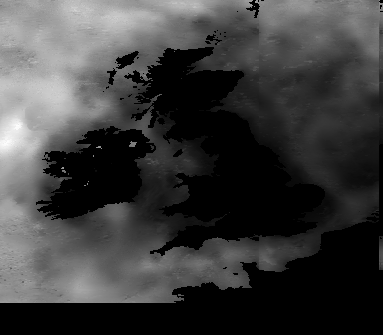

In [13]:
zsd_tensor[0].expand((3, 336, 384))[:,:,:].rgb

In [155]:
df[df['time'] == '2022-01-31']['lat']

0         62.020832
1         62.020832
2         62.020832
3         62.020832
4         62.020832
            ...    
129740    48.020832
129741    48.020832
129742    48.020832
129743    48.020832
129744    48.020832
Name: lat, Length: 129745, dtype: float64

In [137]:
year_df = df[df['time'] < '2023-01-31']
year_df[~year_df['ZSD'].isna()]

,time,lat,lon,KD490,ZSD_uncertainty,KD490_uncertainty,flags,ZSD
12705,2022-01-31,60.645832,-12.020828,0.034284,48.610001,48.610001,2,28.456972
12706,2022-01-31,60.645832,-11.979161,0.037945,42.270000,50.930000,2,24.907763
12707,2022-01-31,60.645832,-11.937495,0.036867,32.759998,51.349998,2,25.852074
12708,2022-01-31,60.645832,-11.895828,0.036754,32.730000,51.389999,2,25.955410
12709,2022-01-31,60.645832,-11.854161,0.036599,32.700001,51.459999,2,26.099274
...,...,...,...,...,...,...,...,...
47356713,2023-01-30,48.020832,-4.812495,0.056629,31.139999,39.549999,2,15.305375
47356714,2023-01-30,48.020832,-4.770828,0.057298,31.279999,39.379997,2,15.096004
47356715,2023-01-30,48.020832,-4.729161,0.057889,31.400000,39.230000,2,14.915576
47356716,2023-01-30,48.020832,-4.687495,0.060162,31.859999,38.669998,2,14.258415


In [159]:
year_df[['time', 'lat', 'lon']].groupby('time').nunique()

,lat,lon
time,,
2022-01-31,337,385
2022-02-01,337,385
2022-02-02,337,385
2022-02-03,337,385
2022-02-04,337,385
...,...,...
2023-01-26,337,385
2023-01-27,337,385
2023-01-28,337,385


In [78]:
#SETUP IMAGE RESOLUTION
W = df['lon'].nunique()
H = df['lat'].nunique()
D = df['time'].nunique()
W, H, D, W*H*D

(384, 336, 369, 47609856)

In [237]:
day_df = df[df['time'] == '2023-01-30']

In [239]:
day_df

,time,lat,lon,KD490,ZSD_uncertainty,KD490_uncertainty,flags,ZSD,norm_ZSD
47227180,2023-01-30,62.020832,-12.020828,NaN,NaN,NaN,0,NaN,NaN
47227181,2023-01-30,62.020832,-11.979161,NaN,NaN,NaN,0,NaN,NaN
47227182,2023-01-30,62.020832,-11.937495,NaN,NaN,NaN,0,NaN,NaN
47227183,2023-01-30,62.020832,-11.895828,NaN,NaN,NaN,0,NaN,NaN
47227184,2023-01-30,62.020832,-11.854161,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
47356920,2023-01-30,48.020832,3.812505,NaN,NaN,NaN,1,NaN,NaN
47356921,2023-01-30,48.020832,3.854172,NaN,NaN,NaN,1,NaN,NaN
47356922,2023-01-30,48.020832,3.895839,NaN,NaN,NaN,1,NaN,NaN
47356923,2023-01-30,48.020832,3.937505,NaN,NaN,NaN,1,NaN,NaN


In [240]:
day_df['norm_ZSD'].fillna(-1, inplace=True)

/tmp/ipykernel_85/3339653982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['norm_ZSD'].fillna(-1, inplace=True)


In [79]:
lon_arr = df['lon'].unique()
# lon_arr.sort()
lat_arr = df['lat'].unique()
time_arr = df['time'].unique()
# lat_arr.sort()

In [271]:
str(time_arr[0])[:10]

'2022-01-31'

In [80]:
lon_ids = {}
lat_ids = {}
time_ids = {}
for i, lon in enumerate(lon_arr):
    lon_ids[lon] = i
for i, lat in enumerate(lat_arr):
    lat_ids[lat] = i
for i, date in enumerate(time_arr):
    time_ids[str(date)[:10]] = i

In [81]:
df['x'] = df['lat'].apply(lambda x: lat_ids[x])
df['y'] = df['lon'].apply(lambda x: lon_ids[x])
df['d'] = df['time'].apply(lambda x: time_ids[str(x)[:10]])

In [278]:
str(df['time'].unique()[0])[:10]

'2022-01-31'

In [82]:
img_df = df[['d','x', 'y', 'norm_ZSD']]
img_df

,d,x,y,norm_ZSD
12706,0,0,0,0.578687
12707,0,0,1,0.600626
12708,0,0,2,0.603027
12709,0,0,3,0.606370
12710,0,0,4,0.608797
...,...,...,...,...
47875693,368,303,172,0.414054
47875694,368,303,173,0.413919
47875695,368,303,174,0.385062
47875696,368,303,175,0.357323


In [280]:
H*4

1348

In [315]:
df.time.min(), df.time.max()

(Timestamp('2022-01-31 00:00:00'), Timestamp('2023-02-03 00:00:00'))

In [83]:
x_img = np.zeros((img_df.d.max()+1, img_df.x.max()+1, img_df.y.max()+1))

In [84]:
x_img.shape

(369, 336, 384)

In [85]:
x_img[img_df.d, img_df.x, img_df.y] = img_df.norm_ZSD

In [86]:
zsd_img1 = torch.tensor(x_img).unsqueeze(1)
zsd_img1

tensor[369, 1, 336, 384] f64 n=47609856 x∈[0., 1.000] μ=0.193 σ=0.185

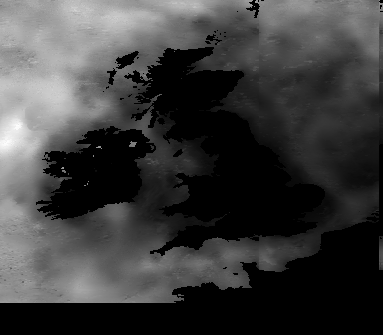

In [96]:
zsd_img1[0].expand(3, H, W).rgb

In [300]:
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

In [314]:
fps=30

out_video_path = 'sea_depth.mp4'

frames = [(f.expand(3, H, W).permute(1,2,0).numpy() * 255).astype(np.uint8) for f in zsd_img]

clip = clip =ImageSequenceClip(frames, fps=fps)
clip.write_videofile(out_video_path, fps=fps)

Moviepy - Building video sea_depth.mp4.
Moviepy - Writing video sea_depth.mp4



Moviepy - Done !
Moviepy - video ready sea_depth.mp4
